In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from kreg import w, r, cross_validation_score_reg, kreg_conf_int

#### Load the data

In [3]:
data1 = pd.read_csv('max_050801.dat', sep='\\s+', header=None)
data1

,0,1,2,3
0,77,1999,675,506
1,147,2960,682,554
2,222,6092,1052,901
3,294,3830,670,577
4,381,2270,569,471
5,449,1468,387,325
6,523,1935,475,408
7,597,1811,511,441
8,671,2100,629,546
9,746,2189,777,680


In [4]:
data2 = pd.read_csv('boom_050801.dat', sep='\\s+', header=None)
data2

,0,1,2,3
0,100,3397,602,602
1,150,4663,572,572
2,200,5580,557,557
3,250,5687,493,493
4,300,3883,327,327
5,350,2582,223,223
6,400,1834,171,171
7,450,2060,177,177
8,500,2263,189,189
9,550,2291,197,197


In [5]:
data3 = pd.read_csv('dasi.dat', sep='\\s+', header=None)
data3

,0,1,2,3,4
0,118,104,167,3770,820
1,203,173,255,5280,550
2,289,261,342,3660,340
3,377,342,418,1650,200
4,465,418,500,1890,220
5,553,506,594,2840,290
6,641,600,676,1670,270
7,725,676,757,2010,350
8,837,763,864,2320,450


In [6]:
xi = np.concatenate([data1.iloc[:, 0], data2.iloc[:, 0], data3.iloc[:, 0]])
yi = np.concatenate([data1.iloc[:, 1], data2.iloc[:, 1], data3.iloc[:, 3]])
sort_idx = np.argsort(xi)
xi = xi[sort_idx]
yi = yi[sort_idx]

#### Perform non-parametric regression

In [7]:
def K(x):
    return np.exp(-x ** 2 / 2)

In [8]:
hs = np.linspace(20, 120, 100)
bw = np.fromiter((cross_validation_score_reg(K, xi, yi, h) for h in hs), float)

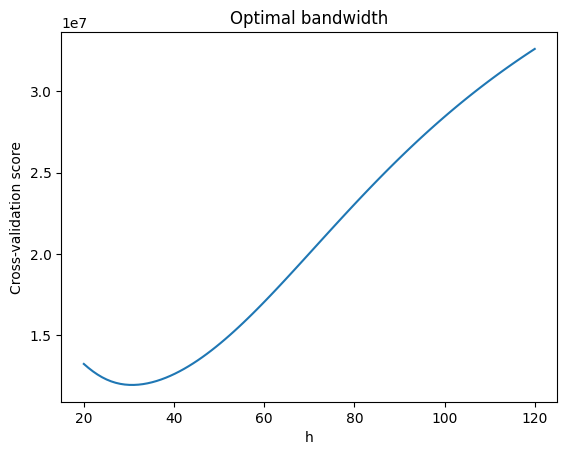

In [9]:
fig, ax = plt.subplots()
ax.plot(hs, bw);
ax.set_xlabel('h');
ax.set_ylabel('Cross-validation score');
ax.set_title('Optimal bandwidth');

The minimum cross-validation score is attained at

In [23]:
h = hs[np.argmin(bw)]
h

np.float64(31.111111111111114)

In [24]:
alpha = 0.05
xs = np.linspace(np.min(xi), np.max(xi), 100)
r_hat, l, u = kreg_conf_int(K, xi, yi, h, alpha, xs)

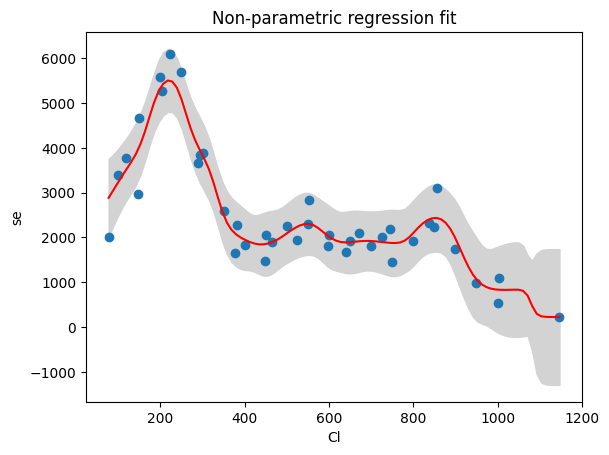

In [25]:
fig, ax = plt.subplots()
ax.fill_between(xs, l, u, color='lightgray');
ax.plot(xs, r_hat, color='red');
ax.scatter(xi, yi);
ax.set_xlabel('Cl');
ax.set_ylabel('se');
ax.set_title('Non-parametric regression fit');

#### Using ``statsmodels``

In [26]:
from statsmodels.nonparametric.kernel_regression import KernelReg

In [39]:
model = KernelReg(yi, xi, bw=[h], var_type='c', ckertype='gaussian', reg_type='lc').fit(xs)

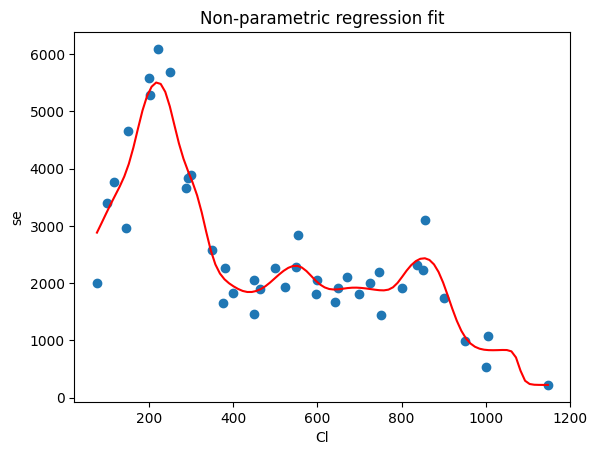

In [40]:
fig, ax = plt.subplots()
#ax.fill_between(xs, l, u, color='lightgray');
ax.plot(xs, model[0], color='red');
ax.scatter(xi, yi);
ax.set_xlabel('Cl');
ax.set_ylabel('se');
ax.set_title('Non-parametric regression fit');